In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import ResNet152V2
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
expres_code = ['ang','dis','fea','hap','sad','sur']
# expressions = [ 0,   1,   2,   3,   4,   5]

In [4]:
data_path = '/content/drive/My Drive/dataset/voilajones_ck+/'
def read_data(dir_path):
    img_names = []
    img_data_list = []
    labels = []
    img_list = os.listdir(dir_path)
    for img in img_list:
        input_img = cv2.imread(dir_path + img)
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img)
        label = img[4:7]  # each name of image have 2 char for label from index 3-5
        labels.append(expres_code.index(label))
        img_names.append(img)
    img_data = np.array(img_data_list)
    print(img_data)
    return img_data, labels, img_names

X, Y, img_names = read_data(data_path)

[[[[ 17  17  17]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 64  64  64]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 17  17  17]
   [ 17  17  17]
   [ 21  21  21]
   ...
   [ 63  63  63]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 18  18  18]
   [ 18  18  18]
   [ 21  21  21]
   ...
   [ 64  64  64]
   [ 64  64  64]
   [ 64  64  64]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[ 12  12  12]
   [ 12  12  12]
   [ 13  13  13]
   ...
   [ 29  29  29]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 13  13  13]
   ...
   [ 29  29  29]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 14  14  14]
   ...
   [ 36  36  36]
   [ 32  32  32]
   [ 32  32

In [5]:
img_x=np.array(X)
img_x = img_x.astype('float32')
img_x = img_x/255
img_x.shape

(927, 224, 224, 3)

In [6]:
labels=np.array(Y)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4,
       4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 4,

In [12]:
resnet = ResNet152V2(include_top=True, weights='imagenet')

out = Dense(6, activation='softmax', name='predictions')(resnet.layers[-2].output)
resnet_model = Model(resnet.input, out)

for layer in resnet_model.layers:
  if layer.name in ['predictions','post_bn','conv5_block3_3_conv']:
      layer.trainable = True
  else:
      layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fea04c55710>,input_2,False
1,<keras.layers.convolutional.ZeroPadding2D object at 0x7fea04c557b8>,conv1_pad,False
2,<keras.layers.convolutional.Conv2D object at 0x7fea04c55908>,conv1_conv,False
3,<keras.layers.convolutional.ZeroPadding2D object at 0x7fea04c55978>,pool1_pad,False
4,<keras.layers.pooling.MaxPooling2D object at 0x7fea04c559e8>,pool1_pool,False
...,...,...,...
561,<keras.layers.merge.Add object at 0x7fe9e96d8ef0>,conv5_block3_out,False
562,<keras.layers.normalization.BatchNormalization object at 0x7fe9e96d8f28>,post_bn,True
563,<keras.layers.core.Activation object at 0x7fe9e96e0be0>,post_relu,False
564,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7fe9e96f7d68>,avg_pool,False


In [13]:
resnet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [14]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_x, labels)

10

In [17]:
import matplotlib.pyplot as plt
input_tensor = Input(shape=(224,224,3))
def cnn_model(x_train,x_test,y_test,y_train):
    resnet = ResNet152V2(include_top=True, weights='imagenet')

    out = Dense(6, activation='softmax', name='predictions')(resnet.layers[-2].output)
    resnet_model = Model(resnet.input, out)

    for layer in resnet_model.layers:
      if layer.name in ['predictions','post_bn','conv5_block3_3_conv']:
          layer.trainable = True
      else:
          layer.trainable = False
    model = Sequential()
    model.add(resnet_model)
    
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=20, batch_size=30,verbose=1)
    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/20
834/834 [==============================] - 9s 11ms/step - loss: 0.8448 - accuracy: 0.7086
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.1797 - accuracy: 0.9568
Epoch 3/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0663 - accuracy: 0.9916
Epoch 4/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0284 - accuracy: 0.9988
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0341 - accuracy: 0.9940
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0243 - accuracy: 0.9964
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0234 - accuracy: 0.9952
Epoch 8/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 9/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0120 - accuracy: 0.9976
Epoch 10/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0087 - accuracy: 1.000

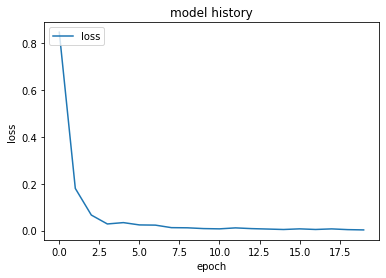

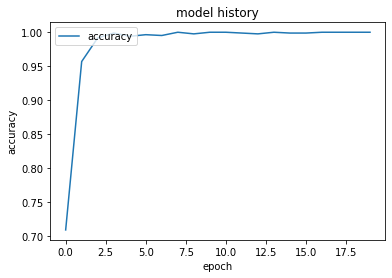

0.4516128897666931
[[ 3  0  4  2  0  4]
 [ 2  0  2  2  0 12]
 [ 1  0  1  0  0  5]
 [ 1  0  0 14  0  6]
 [ 3  0  1  1  0  4]
 [ 0  0  0  1  0 24]]
---------------------------------------------------------------------------
Epoch 1/20
834/834 [==============================] - 9s 11ms/step - loss: 0.7751 - accuracy: 0.7338
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.1421 - accuracy: 0.9712
Epoch 3/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0649 - accuracy: 0.9928
Epoch 4/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0383 - accuracy: 0.9988
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0256 - accuracy: 0.9964
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0236 - accuracy: 0.9976
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 8/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0

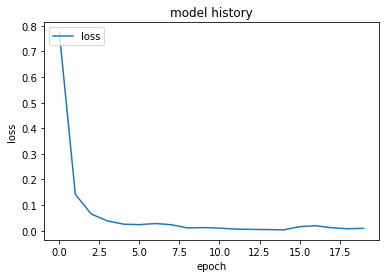

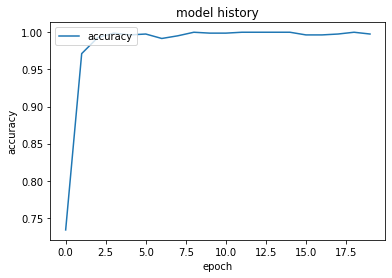

0.4301075339317322
[[ 1  0  9  3  0  1]
 [ 0  0 12  6  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0  1 20  0  0]
 [ 0  0  7  1  0  0]
 [ 0  0  8  2  0 15]]
---------------------------------------------------------------------------
Epoch 1/20
834/834 [==============================] - 9s 11ms/step - loss: 0.8236 - accuracy: 0.7074
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.1510 - accuracy: 0.9664
Epoch 3/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0630 - accuracy: 0.9916
Epoch 4/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0401 - accuracy: 0.9988
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0307 - accuracy: 0.9964
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0204 - accuracy: 0.9976
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 8/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0

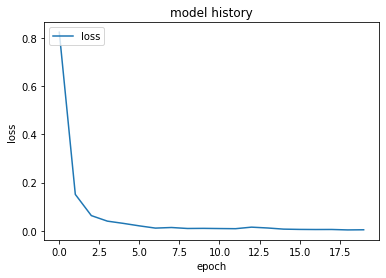

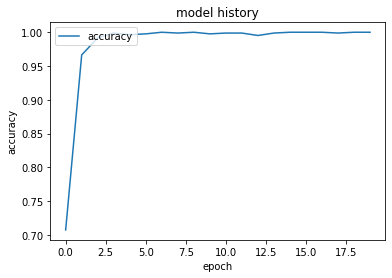

0.47311827540397644
[[ 3  0  0  4  0  7]
 [ 0  0  0  8  0  9]
 [ 2  0  0  2  0  4]
 [ 0  0  0 17  0  4]
 [ 2  0  0  2  0  4]
 [ 0  0  0  1  0 24]]
---------------------------------------------------------------------------
Epoch 1/20
834/834 [==============================] - 9s 11ms/step - loss: 0.7910 - accuracy: 0.7254
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.1956 - accuracy: 0.9472
Epoch 3/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0760 - accuracy: 0.9868
Epoch 4/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0356 - accuracy: 0.9988
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0260 - accuracy: 1.0000
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0255 - accuracy: 0.9976
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 8/20
834/834 [==============================] - 5s 6ms/step - loss: 0.

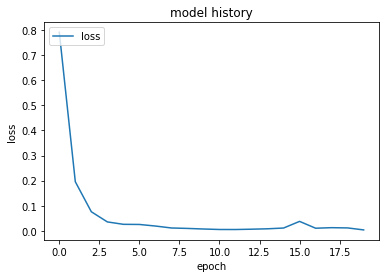

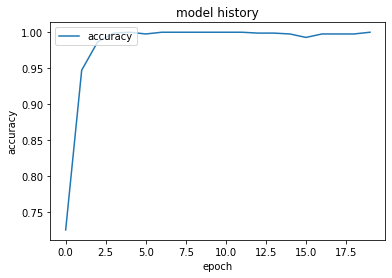

0.5053763389587402
[[ 6  0  1  3  0  4]
 [ 0  0  0 16  0  1]
 [ 1  0  0  4  0  3]
 [ 1  0  0 19  0  1]
 [ 2  0  0  2  0  4]
 [ 0  0  1  2  0 22]]
---------------------------------------------------------------------------
Epoch 1/20
834/834 [==============================] - 10s 11ms/step - loss: 0.8478 - accuracy: 0.6954
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.1487 - accuracy: 0.9700
Epoch 3/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0784 - accuracy: 0.9892
Epoch 4/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0412 - accuracy: 0.9952
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0260 - accuracy: 0.9988
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0244 - accuracy: 0.9964
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0191 - accuracy: 0.9976
Epoch 8/20
834/834 [==============================] - 5s 6ms/step - loss: 0.

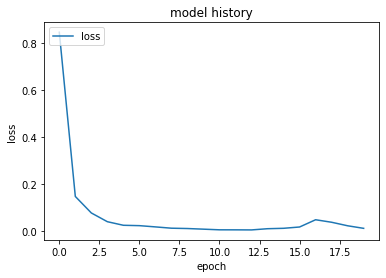

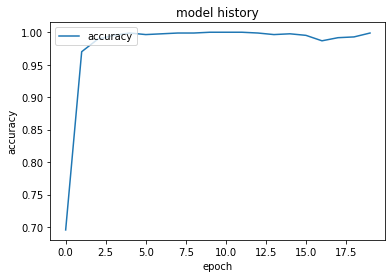

0.49462366104125977
[[ 0  0  4  7  0  3]
 [ 0  0  3 10  0  4]
 [ 0  0  1  4  0  3]
 [ 0  0  0 21  0  0]
 [ 0  0  5  1  0  2]
 [ 0  0  1  0  0 24]]
---------------------------------------------------------------------------
Epoch 1/20
834/834 [==============================] - 10s 12ms/step - loss: 0.7965 - accuracy: 0.7350
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.1482 - accuracy: 0.9592
Epoch 3/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0643 - accuracy: 0.9928
Epoch 4/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0411 - accuracy: 0.9976
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0267 - accuracy: 0.9988
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0171 - accuracy: 0.9988
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 8/20
834/834 [==============================] - 5s 6ms/step - loss: 0

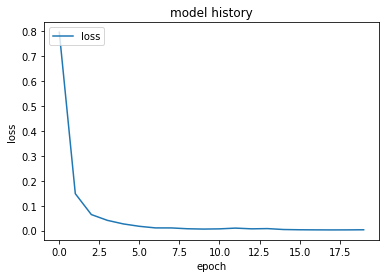

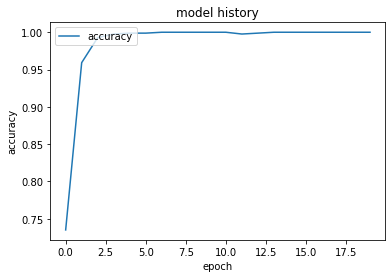

0.3978494703769684
[[ 6  0  2  0  0  6]
 [ 2  0  2  0  0 14]
 [ 1  0  1  1  0  5]
 [ 2  0  1  6  0 12]
 [ 6  0  0  0  0  2]
 [ 0  0  0  0  0 24]]
---------------------------------------------------------------------------
Epoch 1/20
834/834 [==============================] - 9s 11ms/step - loss: 0.8293 - accuracy: 0.6930
Epoch 2/20
834/834 [==============================] - 5s 6ms/step - loss: 0.1696 - accuracy: 0.9616
Epoch 3/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0735 - accuracy: 0.9928
Epoch 4/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0302 - accuracy: 0.9988
Epoch 5/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0259 - accuracy: 0.9964
Epoch 6/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0257 - accuracy: 0.9988
Epoch 7/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0198 - accuracy: 0.9952
Epoch 8/20
834/834 [==============================] - 5s 6ms/step - loss: 0.0

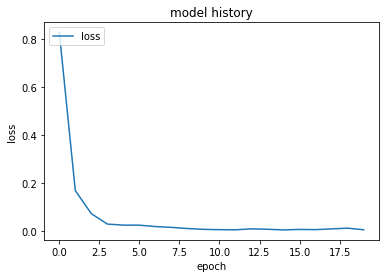

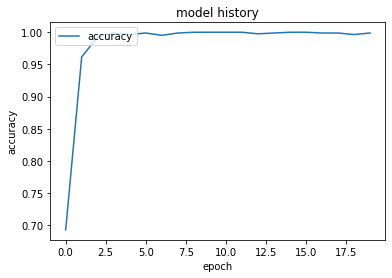

0.5268816947937012
[[ 8  0  2  1  0  2]
 [11  0  0  7  0  0]
 [ 2  0  0  5  0  1]
 [ 3  0  0 18  0  0]
 [ 5  0  0  2  0  1]
 [ 2  0  0  0  0 23]]
---------------------------------------------------------------------------
Epoch 1/20
835/835 [==============================] - 10s 12ms/step - loss: 0.8451 - accuracy: 0.6982
Epoch 2/20
835/835 [==============================] - 5s 6ms/step - loss: 0.2017 - accuracy: 0.9413
Epoch 3/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0971 - accuracy: 0.9820
Epoch 4/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0491 - accuracy: 0.9916
Epoch 5/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0375 - accuracy: 0.9976
Epoch 6/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 7/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0142 - accuracy: 0.9988
Epoch 8/20
835/835 [==============================] - 5s 6ms/step - loss: 0.

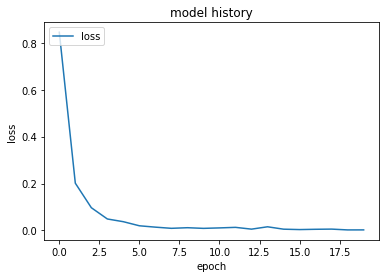

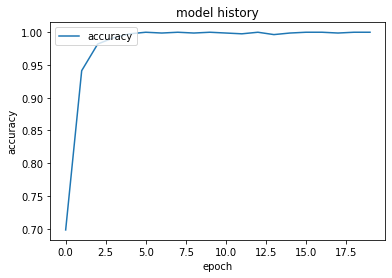

0.54347825050354
[[10  0  0  2  0  1]
 [ 8  0  0  9  0  1]
 [ 2  0  0  2  0  3]
 [ 0  0  0 18  0  2]
 [ 4  0  0  5  0  0]
 [ 2  0  0  1  0 22]]
---------------------------------------------------------------------------
Epoch 1/20
835/835 [==============================] - 10s 12ms/step - loss: 0.8524 - accuracy: 0.7006
Epoch 2/20
835/835 [==============================] - 5s 6ms/step - loss: 0.1499 - accuracy: 0.9677
Epoch 3/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0657 - accuracy: 0.9916
Epoch 4/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0329 - accuracy: 0.9976
Epoch 5/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0222 - accuracy: 1.0000
Epoch 6/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 7/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0153 - accuracy: 0.9988
Epoch 8/20
835/835 [==============================] - 5s 6ms/step - loss: 0.01

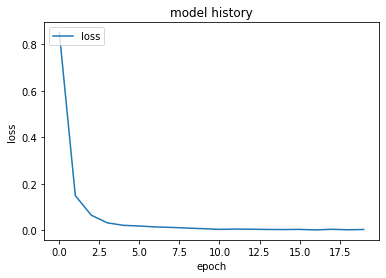

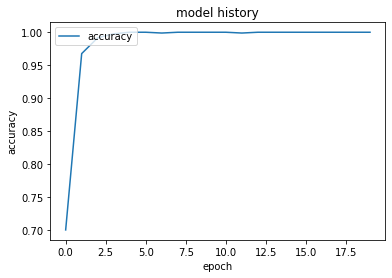

0.41304346919059753
[[12  0  1  0  0  0]
 [14  0  1  0  0  3]
 [ 5  0  1  0  0  1]
 [ 8  0  1  6  0  5]
 [ 9  0  0  0  0  0]
 [ 6  0  0  0  0 19]]
---------------------------------------------------------------------------
Epoch 1/20
835/835 [==============================] - 9s 11ms/step - loss: 0.8112 - accuracy: 0.7257
Epoch 2/20
835/835 [==============================] - 5s 6ms/step - loss: 0.1576 - accuracy: 0.9665
Epoch 3/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0620 - accuracy: 0.9928
Epoch 4/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0385 - accuracy: 0.9976
Epoch 5/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0289 - accuracy: 0.9952
Epoch 6/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0248 - accuracy: 0.9952
Epoch 7/20
835/835 [==============================] - 5s 6ms/step - loss: 0.0163 - accuracy: 0.9976
Epoch 8/20
835/835 [==============================] - 5s 6ms/step - loss: 0.

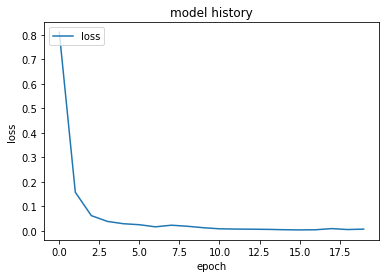

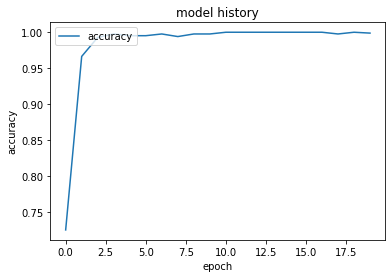

0.5760869383811951
[[ 8  0  4  0  0  1]
 [ 7  0  2  7  0  2]
 [ 0  0  3  1  0  3]
 [ 2  0  0 18  0  0]
 [ 2  0  5  0  0  2]
 [ 0  0  1  0  0 24]]
---------------------------------------------------------------------------


In [18]:
prediction=[]
confusion_list=[]
num_classes = 6
for train_index, test_index in skf.split(img_x,labels):
    x_train, x_test = img_x[train_index,:,:,:], img_x[test_index,:,:,:]
    y_train, y_test = labels[train_index], labels[test_index]
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("---------------------------------------------------------------------------")

In [19]:
print(prediction)

[0.4516128897666931, 0.4301075339317322, 0.47311827540397644, 0.5053763389587402, 0.49462366104125977, 0.3978494703769684, 0.5268816947937012, 0.54347825050354, 0.41304346919059753, 0.5760869383811951]


In [ ]:
for x in range(len(confusion_list)): 
    print (confusion_list[x],sep = "\n")
    print("----------------------------") 

[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[14  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
----------------------------
[[14  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 24]]
----------------------------
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 